# *E. coli* Simulations

In [1]:
# Make sure notebook runs out of vivarium-ecoli directory
import sys, os
notebook_path = sys.path[0][:sys.path[0].index('notebooks')]
sys.path.append(notebook_path)
os.chdir(sys.path[-1])
cwd = os.getcwd()

In [2]:
import os
from ecoli.experiments.ecoli_master_sim import EcoliSim, CONFIG_DIR_PATH
from vivarium.core.engine import pf
from vivarium.core.composer import Composite
from vivarium.plots.simulation_output import plot_variables
from vivarium.plots.topology import plot_topology
from ecoli.plots.topology import get_ecoli_nonpartition_topology_settings, get_ecoli_partition_topology_settings

## *E. coli* non-partitioned

### initialize `EcoliSim` from file

In [3]:
sim_nonpartition = EcoliSim.from_file(CONFIG_DIR_PATH + "no_partition.json")
sim_nonpartition.total_time = 120
sim_nonpartition.divide = False
sim_nonpartition.progress_bar = False
sim_nonpartition.log_updates = False
sim_nonpartition.raw_output = False
sim_nonpartition.build_ecoli()

### print the processes

In [4]:
print(pf(sim_nonpartition.ecoli.processes))

{ 'ecoli-chromosome-structure': <ecoli.processes.chromosome_structure.ChromosomeStructure object at 0x10323c730>,
  'ecoli-metabolism': <ecoli.processes.metabolism.Metabolism object at 0x1246771c0>,
  'ecoli-tf-binding': <ecoli.processes.tf_binding.TfBinding object at 0x12c310d90>,
  'ecoli-transcript-initiation': <ecoli.processes.transcript_initiation.TranscriptInitiation object at 0x124677220>,
  'ecoli-transcript-elongation': <ecoli.processes.transcript_elongation.TranscriptElongation object at 0x124677190>,
  'ecoli-rna-degradation': <ecoli.processes.rna_degradation.RnaDegradation object at 0x12b505070>,
  'ecoli-polypeptide-initiation': <ecoli.processes.polypeptide_initiation.PolypeptideInitiation object at 0x12b505190>,
  'ecoli-polypeptide-elongation': <ecoli.processes.polypeptide_elongation.PolypeptideElongation object at 0x12dfa35b0>,
  'ecoli-complexation': <ecoli.processes.complexation.Complexation object at 0x12b5051c0>,
  'ecoli-two-component-system': <ecoli.processes.two_

### print the topology

In [5]:
print(pf(sim_nonpartition.ecoli.topology))

{ 'ecoli-chromosome-structure': { 'listeners': ('listeners',),
                                  'fragmentBases': ('bulk',),
                                  'molecules': ('bulk',),
                                  'active_tfs': ('bulk',),
                                  'subunits': ('bulk',),
                                  'amino_acids': ('bulk',),
                                  'active_replisomes': ( 'unique',
                                                         'active_replisome'),
                                  'oriCs': ('unique', 'oriC'),
                                  'chromosome_domains': ( 'unique',
                                                          'chromosome_domain'),
                                  'active_RNAPs': ('unique', 'active_RNAP'),
                                  'RNAs': ('unique', 'RNA'),
                                  'active_ribosome': ( 'unique',
                                                       'active_ribosome'),
       

### plot the topology

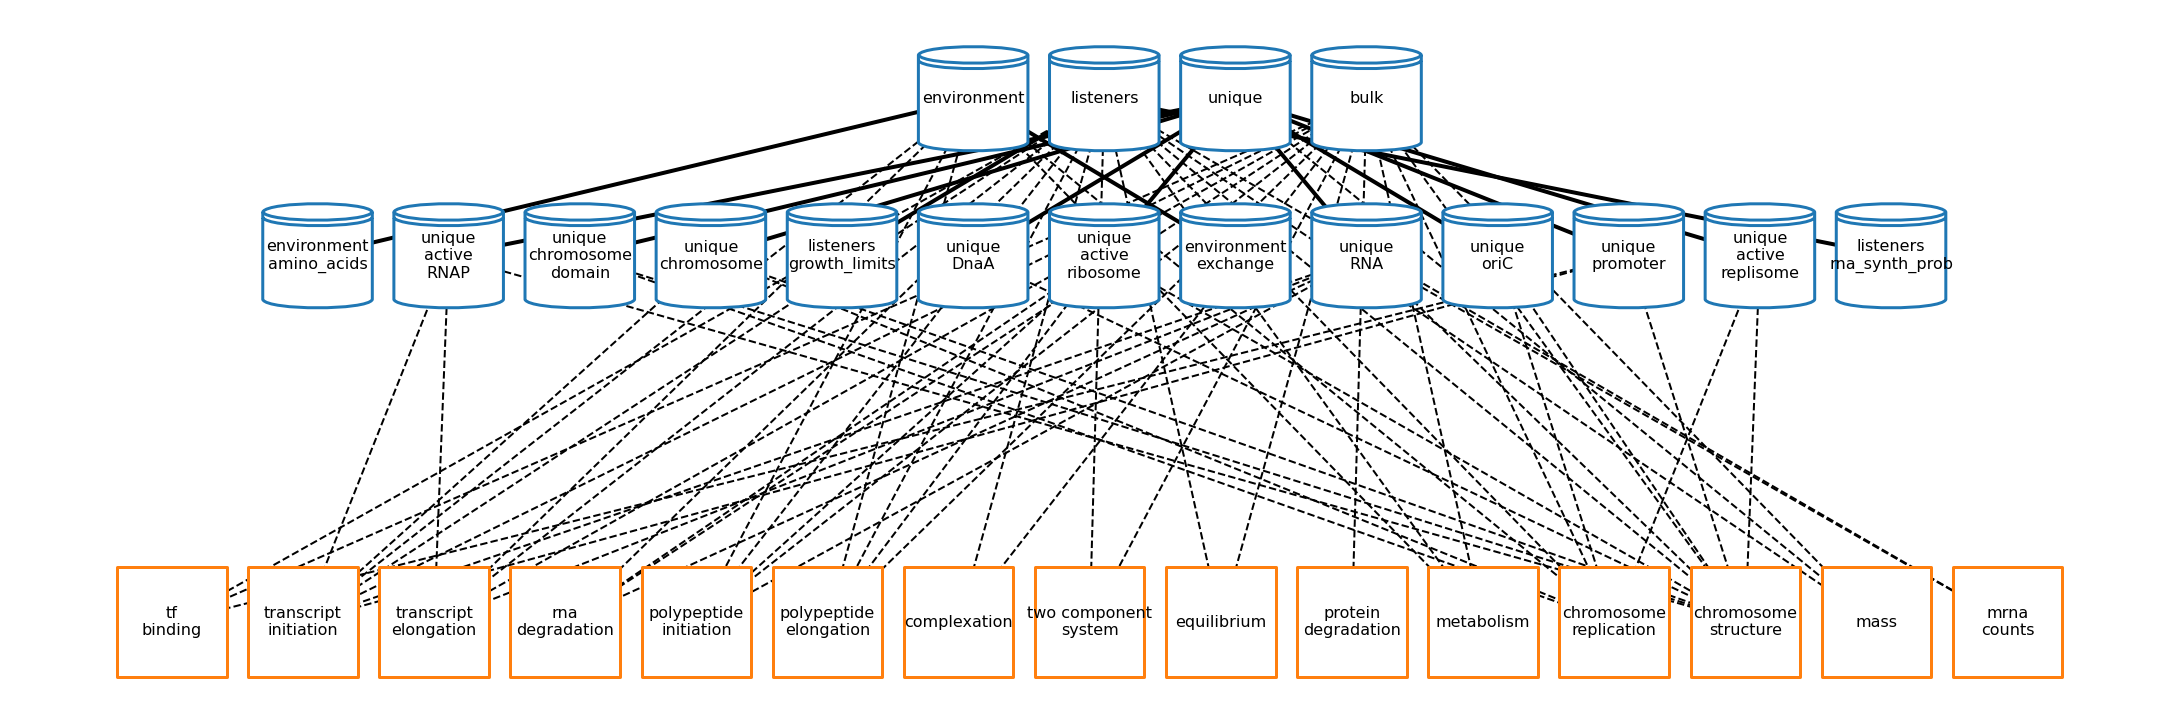

In [6]:
ecoli_composite = Composite({
    'processes': sim_nonpartition.ecoli.processes,
    'topology': sim_nonpartition.ecoli.topology,
})
topology_settings = get_ecoli_nonpartition_topology_settings()
topology_settings['font_size'] = 16
fig = plot_topology(ecoli_composite, topology_settings)

### run simulation

In [7]:
sim_nonpartition.run()
nonpartition_output = sim_nonpartition.query()


Simulation ID: 199f0850-2d74-11ec-947e-acde48001122
Created: 10/14/2021 at 21:55:22
Completed in 90.93 seconds


In [8]:
print(nonpartition_output['listeners']['mass'].keys())

dict_keys(['cell_mass', 'dry_mass', 'water_mass', 'rnaMass', 'rRnaMass', 'tRnaMass', 'mRnaMass', 'dnaMass', 'proteinMass', 'smallMoleculeMass', 'volume', 'proteinMassFraction', 'rnaMassFraction', 'growth', 'instantaniousGrowthRate', 'dryMassFoldChange', 'proteinMassFoldChange', 'rnaMassFoldChange', 'smallMoleculeFoldChange'])


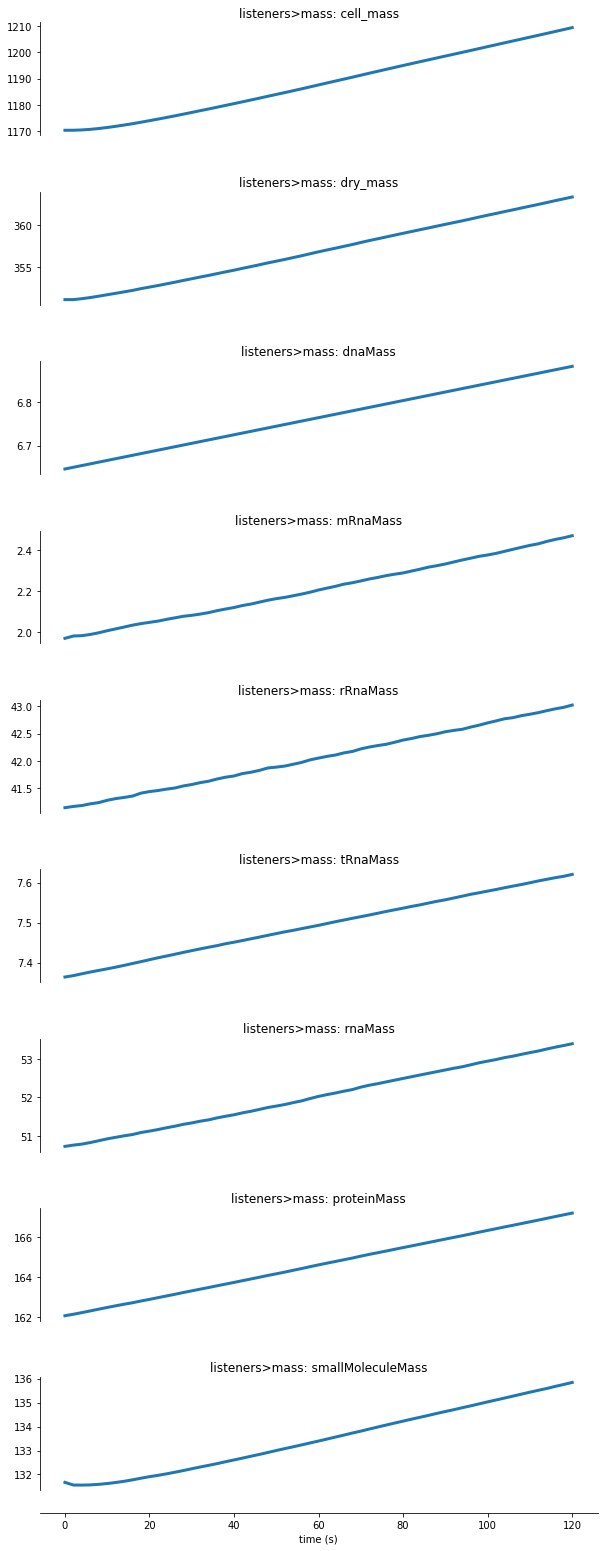

In [9]:
# plot 
fig = plot_variables(
    nonpartition_output, 
    variables=[
        ('listeners', 'mass', 'cell_mass'), 
        ('listeners', 'mass', 'dry_mass'), 
        ('listeners', 'mass', 'dnaMass'), 
        ('listeners', 'mass', 'mRnaMass'), 
        ('listeners', 'mass', 'rRnaMass'), 
        ('listeners', 'mass', 'tRnaMass'), 
        ('listeners', 'mass', 'rnaMass'), 
        ('listeners', 'mass', 'proteinMass'), 
        ('listeners', 'mass', 'smallMoleculeMass'), 
    ],
    column_width=10, row_height=3, row_padding=0.5)

## *E. coli* master
This model uses partitioning.

### initialize `EcoliSim` from file

In [10]:
sim_master = EcoliSim.from_file()
sim_master.total_time = 120
sim_master.divide = False
sim_master.progress_bar = False
sim_master.log_updates = False
sim_master.raw_output = False
sim_master.build_ecoli()

### print the processes

In [11]:
print(pf(sim_master.ecoli.processes))

{ 'ecoli-chromosome-structure': <ecoli.processes.chromosome_structure.ChromosomeStructure object at 0x124670850>,
  'ecoli-metabolism': <ecoli.processes.metabolism.Metabolism object at 0x124670760>,
  'ecoli-tf-binding_requester': <ecoli.processes.partition.Requester object at 0x1ad589a60>,
  'ecoli-transcript-initiation_requester': <ecoli.processes.partition.Requester object at 0x1ad589a30>,
  'ecoli-transcript-elongation_requester': <ecoli.processes.partition.Requester object at 0x1ad589ac0>,
  'ecoli-rna-degradation_requester': <ecoli.processes.partition.Requester object at 0x1ad589a90>,
  'ecoli-polypeptide-initiation_requester': <ecoli.processes.partition.Requester object at 0x1ad589af0>,
  'ecoli-polypeptide-elongation_requester': <ecoli.processes.partition.Requester object at 0x1ad589b20>,
  'ecoli-complexation_requester': <ecoli.processes.partition.Requester object at 0x1ad589b50>,
  'ecoli-two-component-system_requester': <ecoli.processes.partition.Requester object at 0x1ad589

### print the topology

In [12]:
print(pf(sim_master.ecoli.topology))

{ 'ecoli-chromosome-structure': { 'listeners': ('listeners',),
                                  'fragmentBases': ('bulk',),
                                  'molecules': ('bulk',),
                                  'active_tfs': ('bulk',),
                                  'subunits': ('bulk',),
                                  'amino_acids': ('bulk',),
                                  'active_replisomes': ( 'unique',
                                                         'active_replisome'),
                                  'oriCs': ('unique', 'oriC'),
                                  'chromosome_domains': ( 'unique',
                                                          'chromosome_domain'),
                                  'active_RNAPs': ('unique', 'active_RNAP'),
                                  'RNAs': ('unique', 'RNA'),
                                  'active_ribosome': ( 'unique',
                                                       'active_ribosome'),
       

### plot the topology

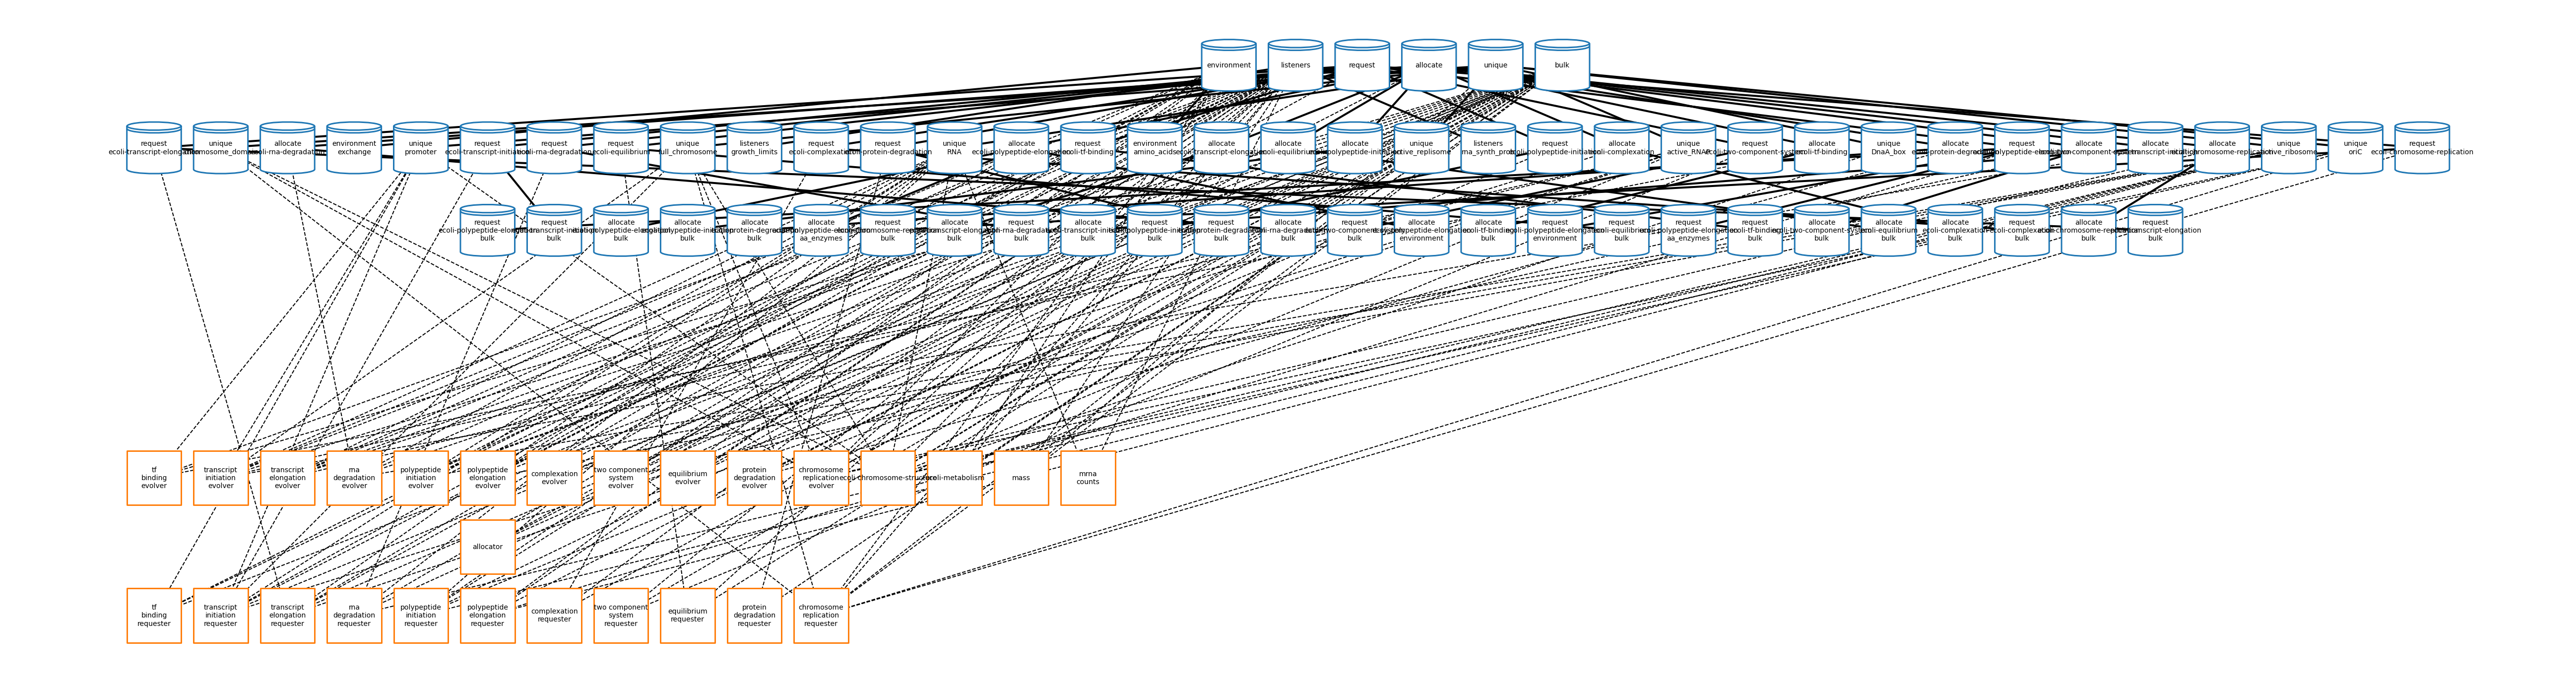

In [13]:
ecoli_master_composite = Composite({
    'processes': sim_master.ecoli.processes,
    'topology': sim_master.ecoli.topology,
})
topology_settings = get_ecoli_partition_topology_settings()
fig = plot_topology(ecoli_master_composite, topology_settings)

### run simulation

In [14]:
sim_master.run()
master_output = sim_master.query()


Simulation ID: 72a05148-2d74-11ec-947e-acde48001122
Created: 10/14/2021 at 21:57:53
Completed in 141.15 seconds


### Mass Fraction Summary Plot

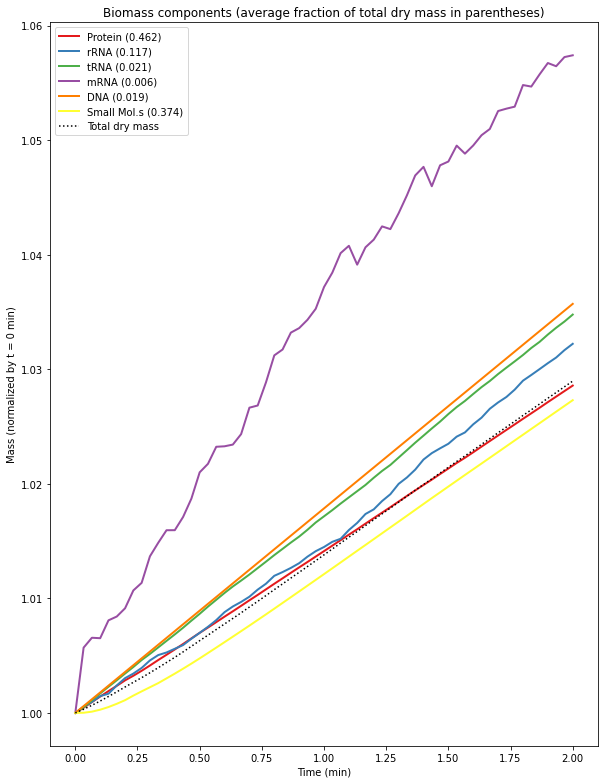

In [30]:
from ecoli.analysis.massFractionSummary import Plot as massFractionPlot

fig = massFractionPlot(master_output).do_plot(master_output)
fig